In [1]:
import pandas as pd
import os

from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
import string
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mw116\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mw116\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def combine_csv_file(csv_files, output_file):
    for csv_file in csv_files:
        if not os.path.exists(csv_file):
            print(f"File not found: {csv_file}")
            return  
        
    output_dir = os.path.dirname(output_file)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

    combined_df = pd.concat(dataframes, axis=0)

    combined_df.reset_index(drop=True, inplace=True)

    combined_df.to_csv(output_file, index=False)

    print(f"Combined CSV files saved to {output_file}")

In [5]:
# For Blip Data
blip_csv_files = ['../../input/Landscape/Train/Labels/Blip_Label.csv',
             '../../input/Landscape/Validation/Labels/Blip_Label.csv',
             '../../input/Landscape/Test/Labels/Blip_Label.csv']

# For Kosomos Data
kosomos_csv_files = ['../../Input/Landscape/Train/Labels/Kosmos_Label.csv',
             '../../Input/Landscape/Validation/Labels/Kosmos_Label.csv',
             '../../Input/Landscape/Test/Labels/Kosmos_Label.csv']

In [7]:
blip_output_file = '../../input/Landscape/Label/Blip_Label.csv'
combine_csv_file(blip_csv_files, blip_output_file)

kosomos_output_file = '../../input/Landscape/Label/Kosmos_Label.csv'
combine_csv_file(kosomos_csv_files, kosomos_output_file)

flicker30k_file = '../../input/Flicker30k/flick30k_filtered_result.csv'

Combined CSV files saved to ../../input/Landscape/Label/Blip_Label.csv
Combined CSV files saved to ../../input/Landscape/Label/Kosmos_Label.csv


In [8]:
file_path = [blip_output_file, kosomos_output_file, flicker30k_file]

In [14]:
# Overall Length Statistics
def analyze_caption_lengths(file_path, title):
    df = pd.read_csv(file_path)

    if 'image_caption' in df.columns:
        caption_col = 'image_caption'
    elif 'caption' in df.columns:
        caption_col = 'caption'
    else:
        print(f"No known caption column found in {title}.")
        return

    caption_lengths = df[caption_col].apply(lambda x: len(x.split()))
    mean_length = caption_lengths.mean()
    min_length = caption_lengths.min()
    max_length = caption_lengths.max()

    print(f"Analysis for {title}:")
    print("Mean caption length:", mean_length)
    print("Minimum caption length:", min_length)
    print("Maximum caption length:", max_length)

    unique_captions = df[caption_col].nunique()
    print("Number of unique captions:", unique_captions)

    min_length_captions = df[df[caption_col].apply(lambda x: len(x.split())) <= 2][caption_col]
    print(f"\nCaptions with length <= 2 for {title}:")
    for caption in min_length_captions:
        print(caption)
    print("")  

In [15]:
output_files = {blip_output_file: 'Blip_Label', 
                kosomos_output_file: 'Kosmos_Label',
                flicker30k_file: 'Flicker30k_Label'}

In [16]:
for file, title in output_files.items():
    analyze_caption_lengths(file, title)

Analysis for Blip_Label:
Mean caption length: 8.501833333333334
Minimum caption length: 2
Maximum caption length: 20
Number of unique captions: 8710

Captions with length <= 2 for Blip_Label:
mykonos beach
icelandic waterfall
iceland waterfall
iceland waterfall

Analysis for Kosmos_Label:
Mean caption length: 7.5151666666666666
Minimum caption length: 1
Maximum caption length: 40
Number of unique captions: 7759

Captions with length <= 2 for Kosmos_Label:
the shipwreck
beach huts
seagrass underwater
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
camels
sand dunes
a wallaby
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
sand dunes
green moss
green leaves
palm leaves
green leaves
palm trees
baby owls
green leaves
trees
tall trees
green leaves
green leaves
green ferns
green leaves
green le

In [ ]:
# Classify captions of flicker30k dataset by label


In [17]:
def analyze_caption_lengths_by_class(file_path, title):
    df = pd.read_csv(file_path)

    for image_class, group in df.groupby('image_class'):
      caption_lengths = group['image_caption'].apply(lambda x: len(x.split()))
      mean_length = caption_lengths.mean()
      min_length = caption_lengths.min()
      max_length = caption_lengths.max()

      print(f"Analysis for {title} - Class '{image_class}':")
      print("Mean caption length:", mean_length)
      print("Minimum caption length:", min_length)
      print("Maximum caption length:", max_length)

      # Count the number of unique captions within the class
      unique_captions = group['image_caption'].nunique()
      print("Number of unique captions:", unique_captions)
      print("")

In [25]:
for file, title in output_files.items():
    analyze_caption_lengths_by_class(file, title)

Analysis for Blip_Label - Class 'Coast':
Mean caption length: 8.485833333333334
Minimum caption length: 2
Maximum caption length: 28
Number of unique captions: 1876

Analysis for Blip_Label - Class 'Desert':
Mean caption length: 7.7195833333333335
Minimum caption length: 1
Maximum caption length: 30
Number of unique captions: 1553

Analysis for Blip_Label - Class 'Forest':
Mean caption length: 7.098333333333334
Minimum caption length: 1
Maximum caption length: 40
Number of unique captions: 1507

Analysis for Blip_Label - Class 'Glacier':
Mean caption length: 6.773333333333333
Minimum caption length: 1
Maximum caption length: 32
Number of unique captions: 1316

Analysis for Blip_Label - Class 'Mountain':
Mean caption length: 7.49875
Minimum caption length: 1
Maximum caption length: 39
Number of unique captions: 1671

Analysis for Blip_Label - Class 'Coast':
Mean caption length: 8.485833333333334
Minimum caption length: 2
Maximum caption length: 28
Number of unique captions: 1876

Analys

In [34]:
def find_repeated_captions(file_path):
    df = pd.read_csv(file_path)
    
    # Identifying all duplicated captions
    duplicated_df = df[df.duplicated('image_caption', keep=False)]
    # Count occurrences of each caption and sort them in descending order
    caption_counts = duplicated_df['image_caption'].value_counts().sort_values(ascending=False)

    print(f"File: {file_path}")
    total_repeated = caption_counts.size
    print(f"Total number of unique captions repeated: {total_repeated}\n")

    for caption, count in caption_counts.items():
        print(f'Caption "{caption}" repeated {count} times')

    print("")

In [35]:
for file, title in output_files.items():
    find_repeated_captions(file)

File: ../Landscape/Label/Blip_Label.csv
Total number of unique captions repeated: 1221

Caption "a glacier and mountains" repeated 222 times
Caption "a forest in autumn" repeated 63 times
Caption "a glacier and water" repeated 61 times
Caption "a lake in the mountains" repeated 56 times
Caption "a lake and mountains" repeated 55 times
Caption "an iceberg and water" repeated 45 times
Caption "a forest with sunlight shining through the trees" repeated 43 times
Caption "a snow-covered mountain" repeated 40 times
Caption "icebergs floating in the ocean" repeated 40 times
Caption "a lush green forest" repeated 39 times
Caption "a forest with the sun shining through the trees" repeated 36 times
Caption "a sand dune and blue sky" repeated 34 times
Caption "a forest with sunlight streaming through the trees" repeated 33 times
Caption "sand dunes" repeated 32 times
Caption "a glacier and a lake" repeated 29 times
Caption "a desert at sunset" repeated 28 times
Caption "a lake surrounded by mount

In [37]:
def visualize_top_words(file_path, title):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Tokenize captions
    stop_words = set(stopwords.words('english'))
    tokenized_captions = word_tokenize(' '.join(df['image_caption']).lower())  # Assuming captions are space-separated sentences

    # Remove stopwords and punctuation
    filtered_captions = [word for word in tokenized_captions if word not in stop_words and word not in string.punctuation]

    # Calculate word frequencies
    word_freq = Counter(filtered_captions)

    # Visualize most frequent words using word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of Most Frequent Words in {title} Captions (excluding stopwords and punctuation)')
    plt.axis('off')
    plt.show()

    # Visualize most frequent words using bar chart
    most_common_words = word_freq.most_common(20)  # Change 20 to adjust the number of words to display

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(most_common_words)), [val[1] for val in most_common_words], tick_label=[val[0] for val in most_common_words])
    plt.title(f'Bar Chart of Most Frequent Words in {title} Captions (excluding stopwords and punctuation)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

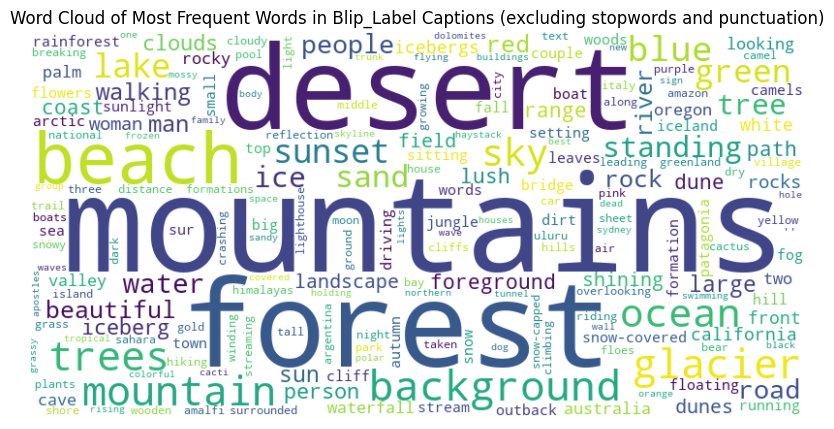

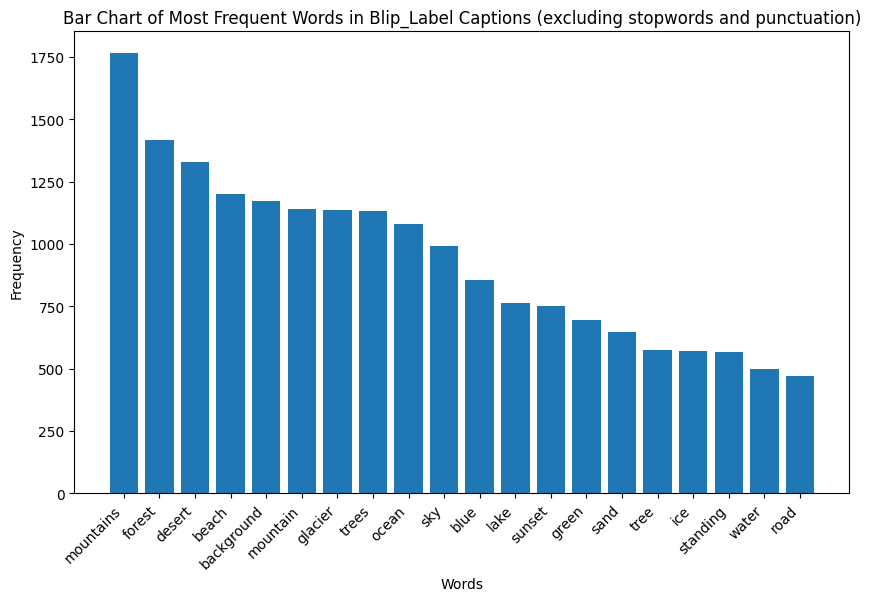

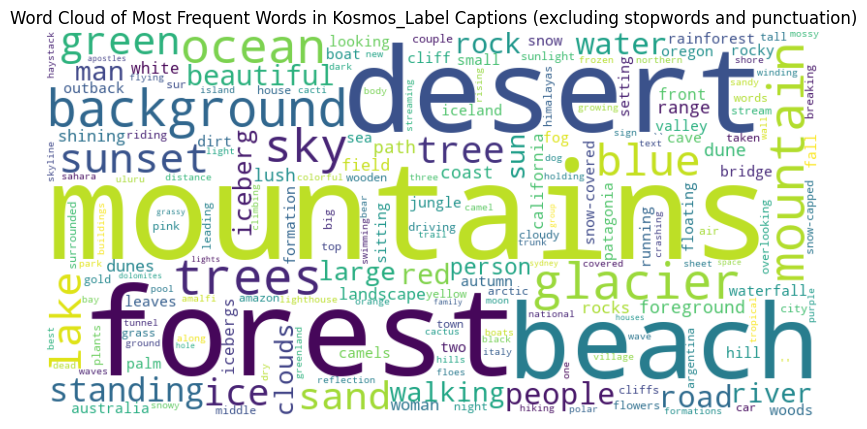

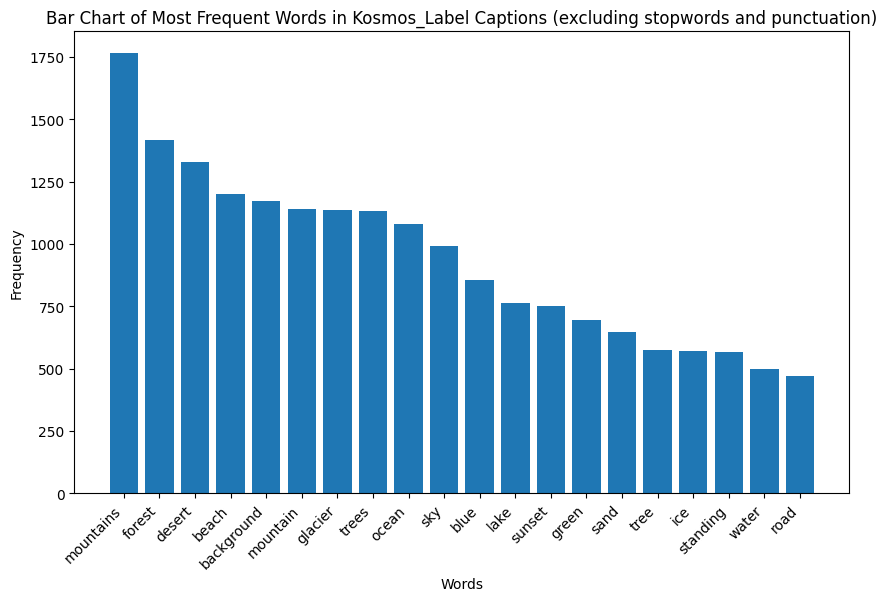

In [38]:
for file, title in output_files.items():
    visualize_top_words(file, title)

In [39]:
def visualize_top_words_by_class(file_path, title):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Group by 'image_class' and then analyze captions for each class
    for image_class, group in df.groupby('image_class'):
        # Tokenize captions
        stop_words = set(stopwords.words('english'))
        tokenized_captions = word_tokenize(' '.join(group['image_caption']).lower())  # Assuming captions are space-separated sentences

        # Remove stopwords and punctuation
        filtered_captions = [word for word in tokenized_captions if word not in stop_words and word not in string.punctuation]

        # Calculate word frequencies
        word_freq = Counter(filtered_captions)

        # Visualize most frequent words using word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud of Most Frequent Words in {title} - Class: {image_class} Captions (excluding stopwords and punctuation)')
        plt.axis('off')
        plt.show()

        # Visualize most frequent words using bar chart
        most_common_words = word_freq.most_common(20)  # Change 20 to adjust the number of words to display

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(most_common_words)), [val[1] for val in most_common_words], tick_label=[val[0] for val in most_common_words])
        plt.title(f'Bar Chart of Most Frequent Words in {title} - Class: {image_class} Captions (excluding stopwords and punctuation)')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()

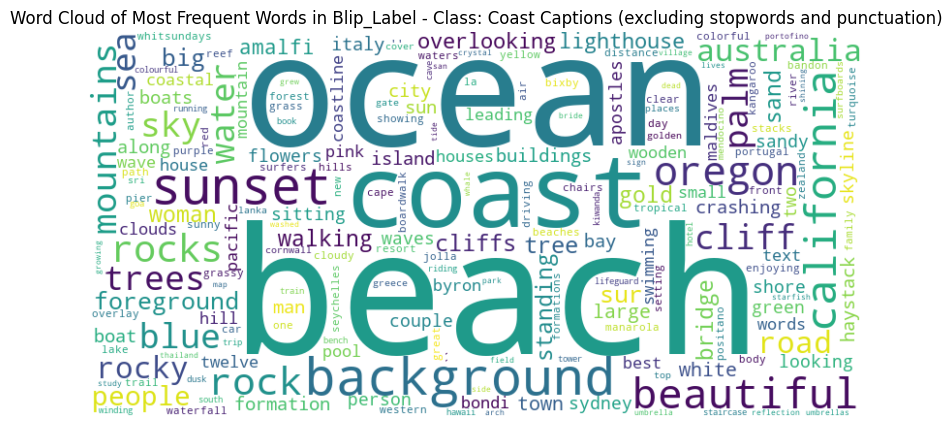

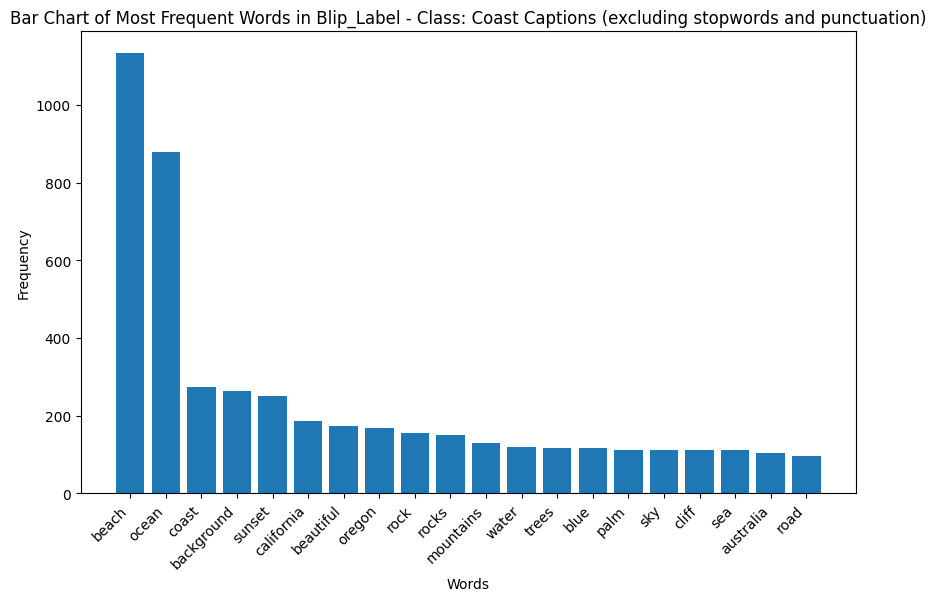

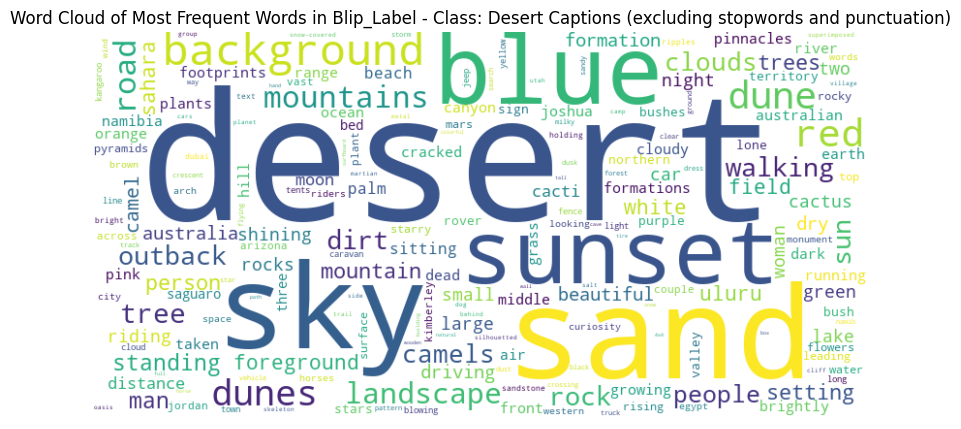

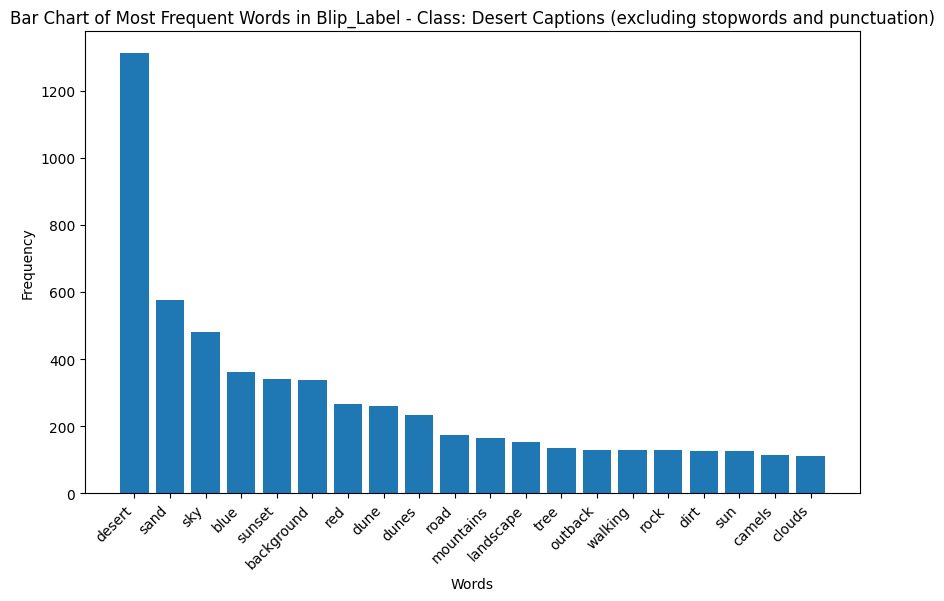

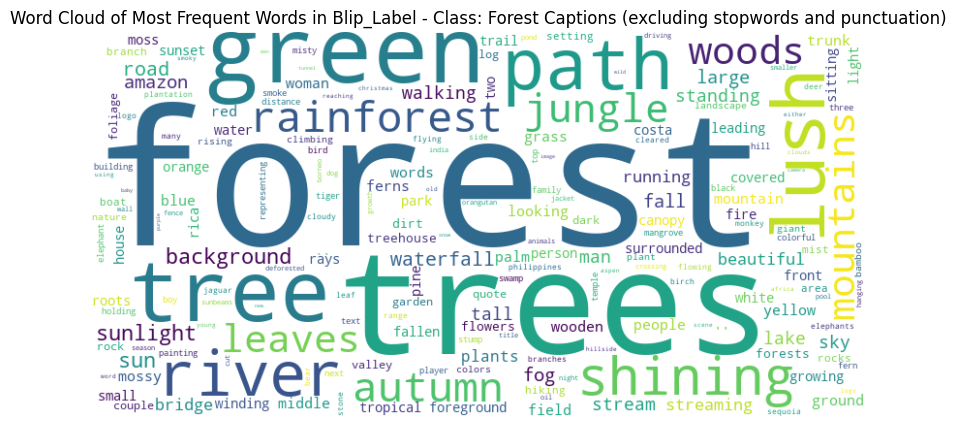

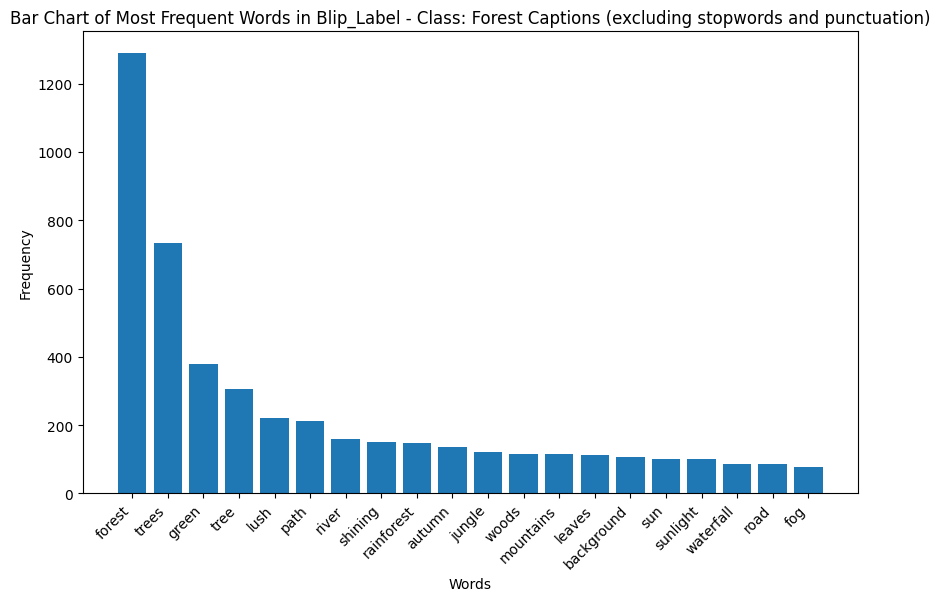

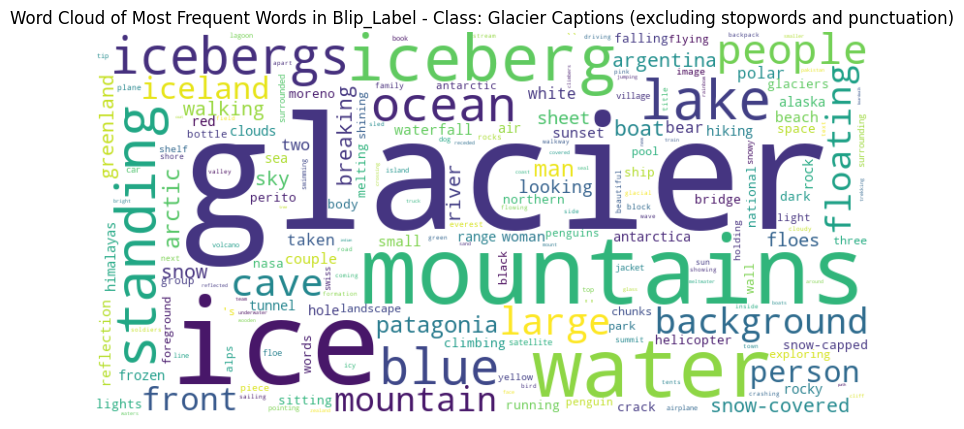

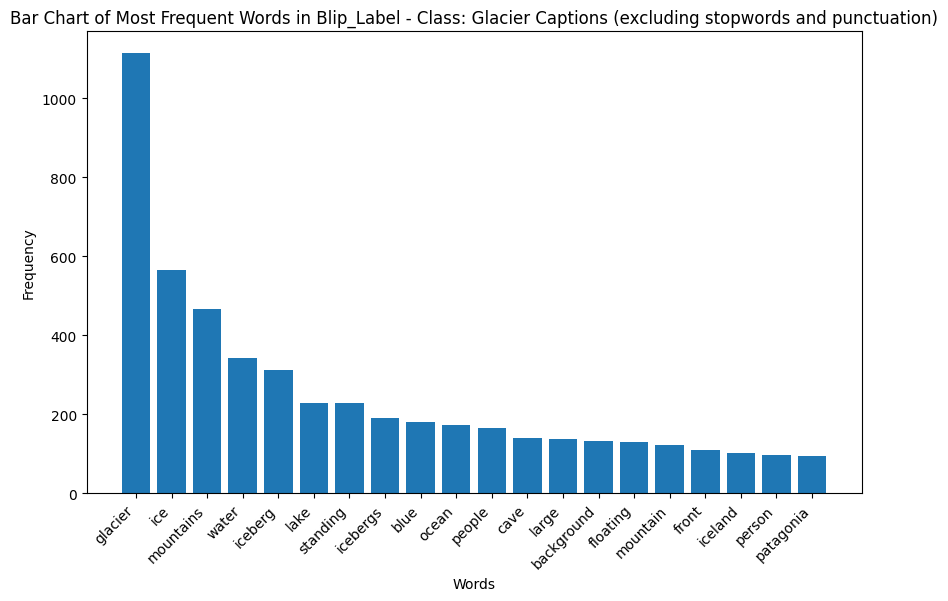

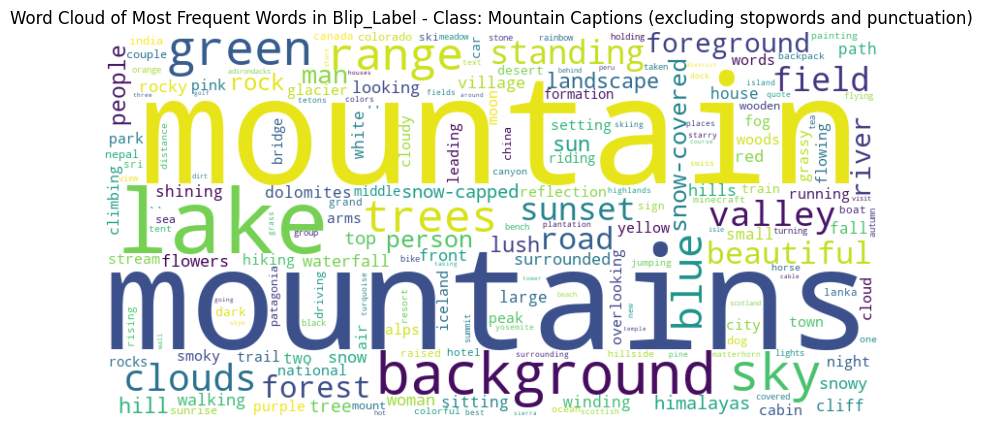

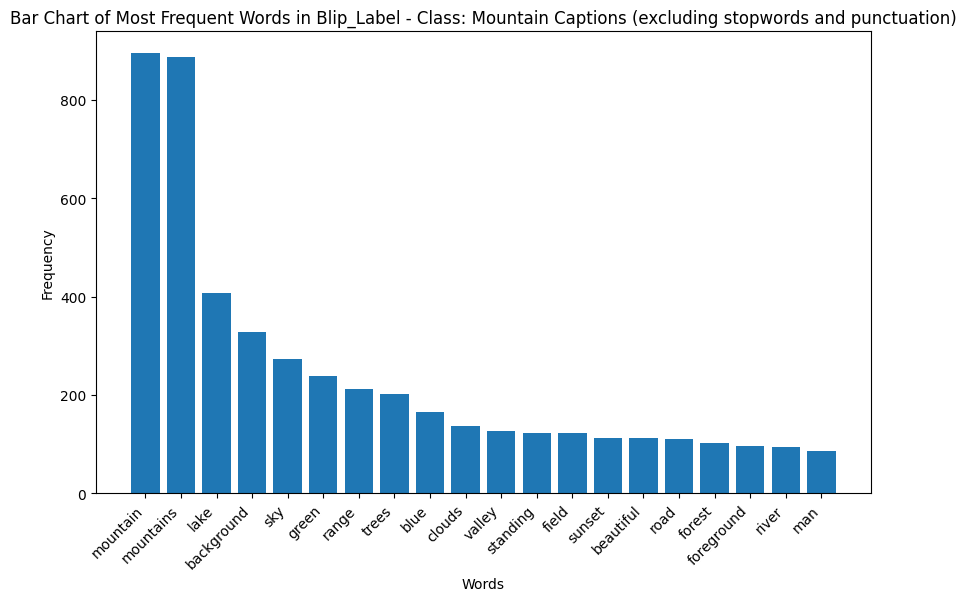

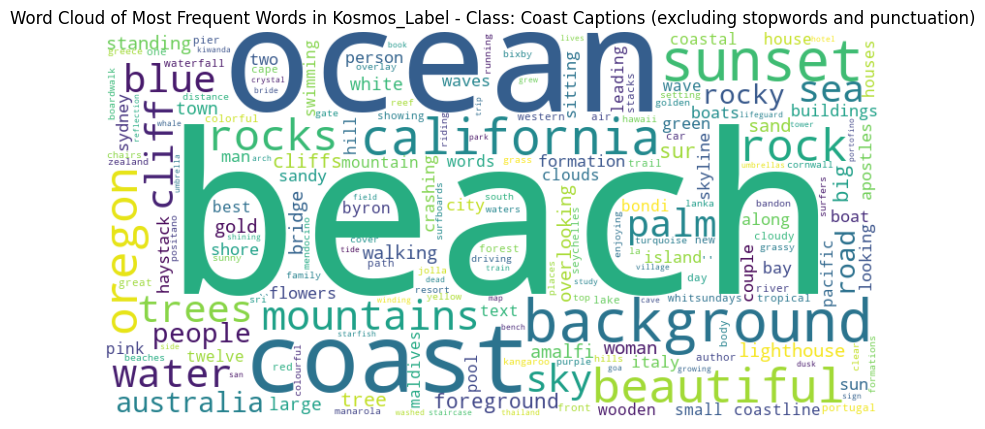

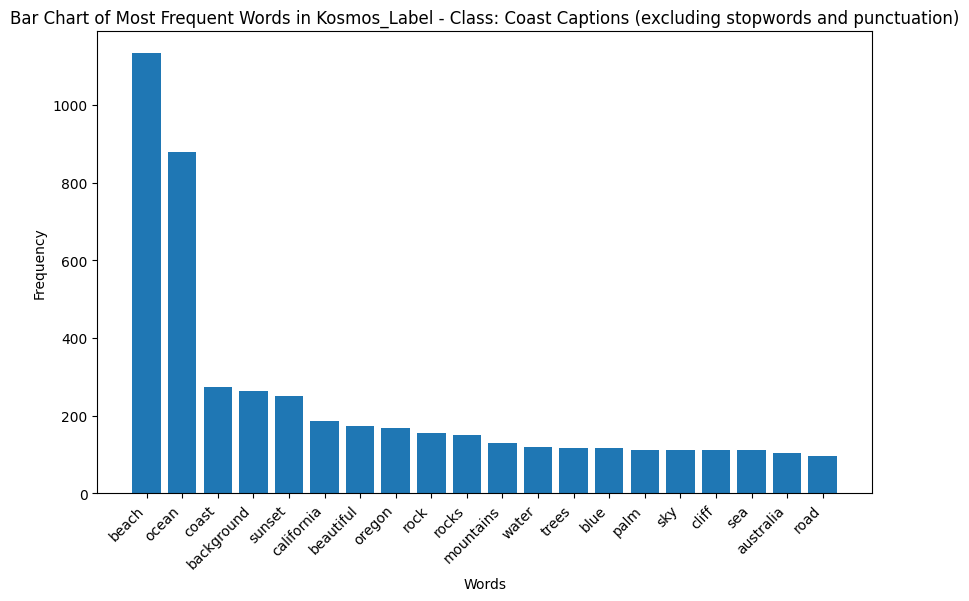

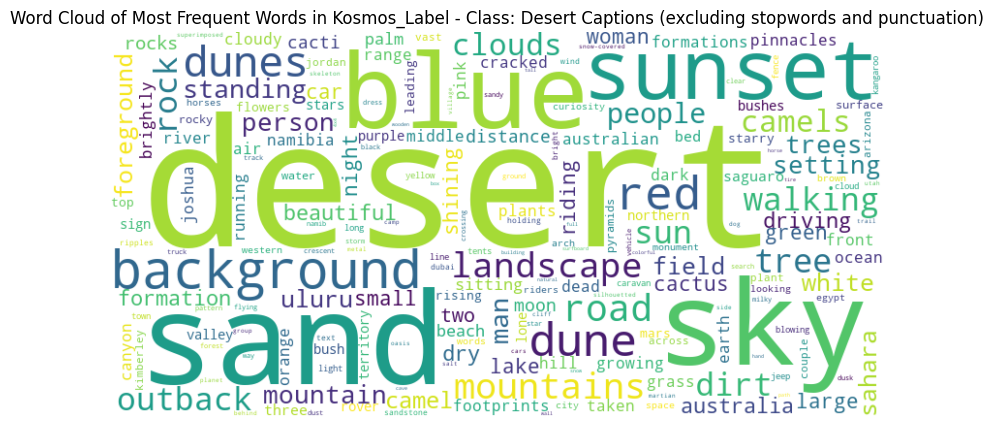

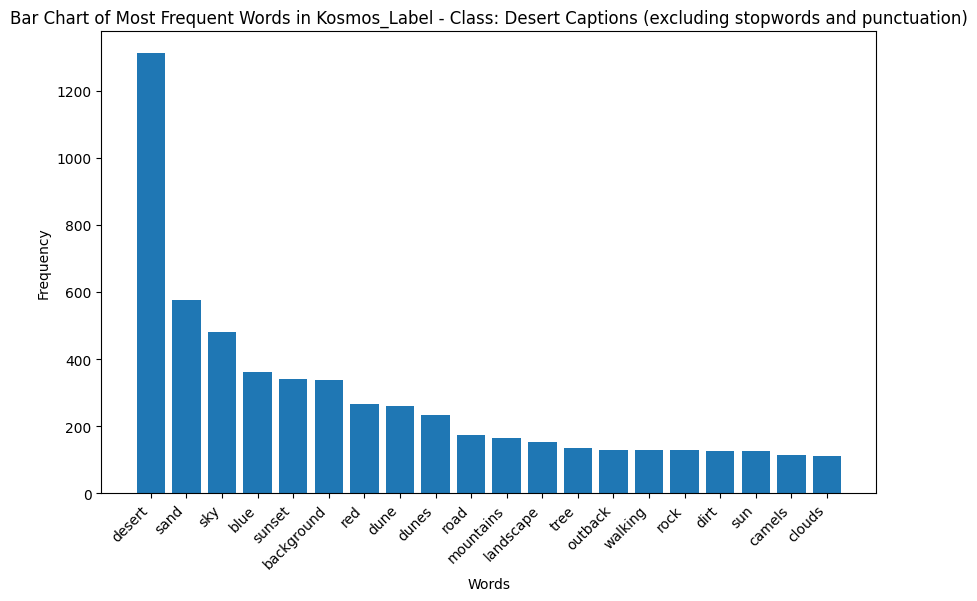

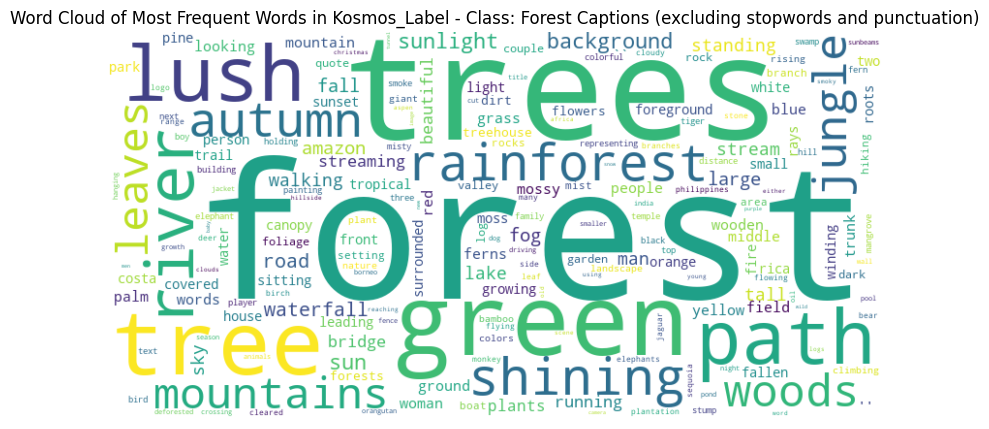

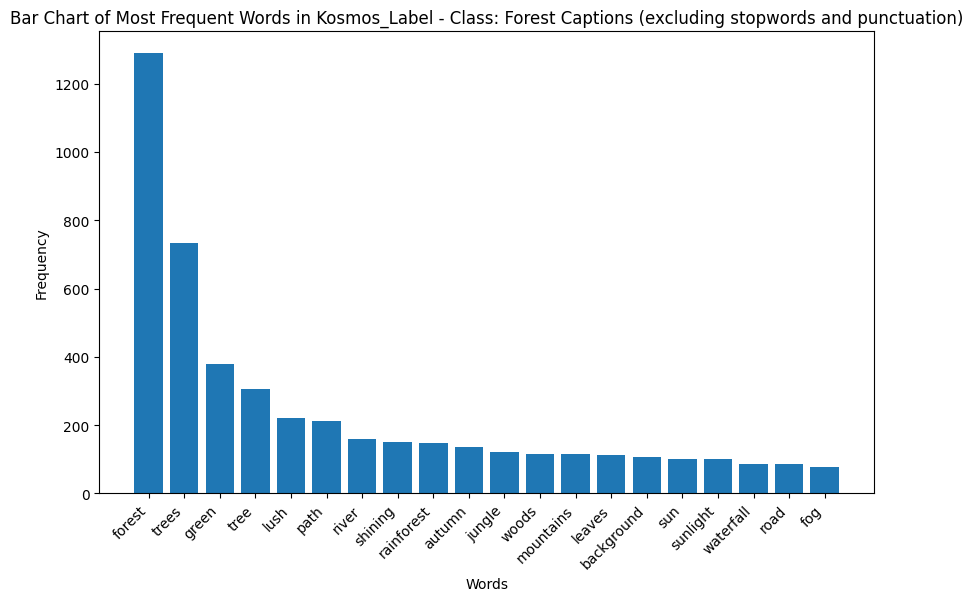

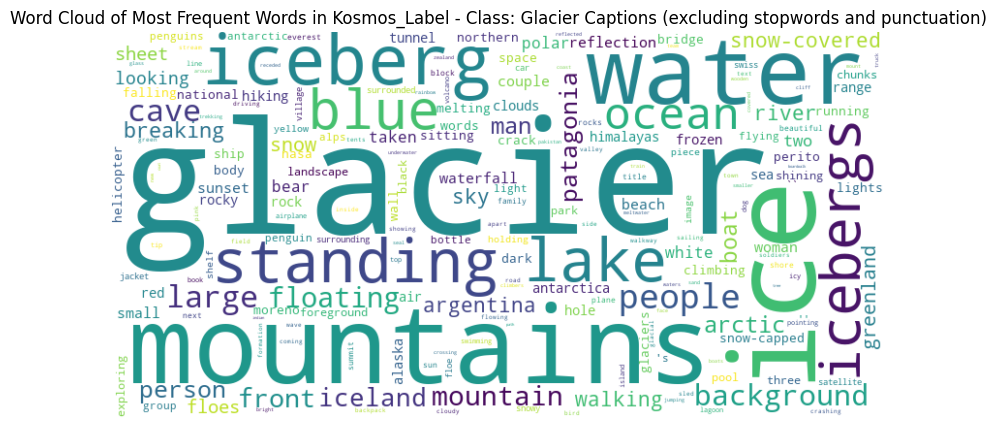

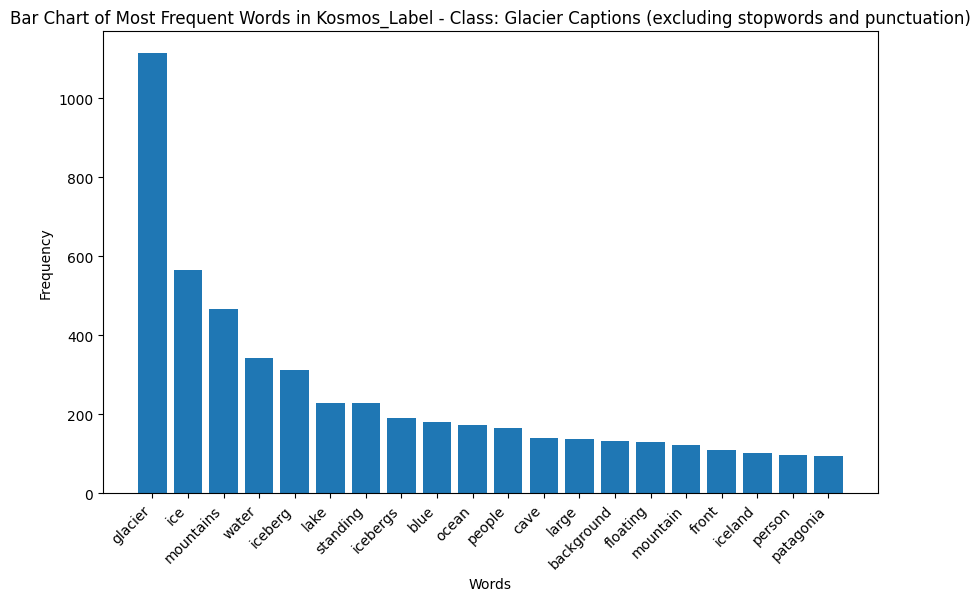

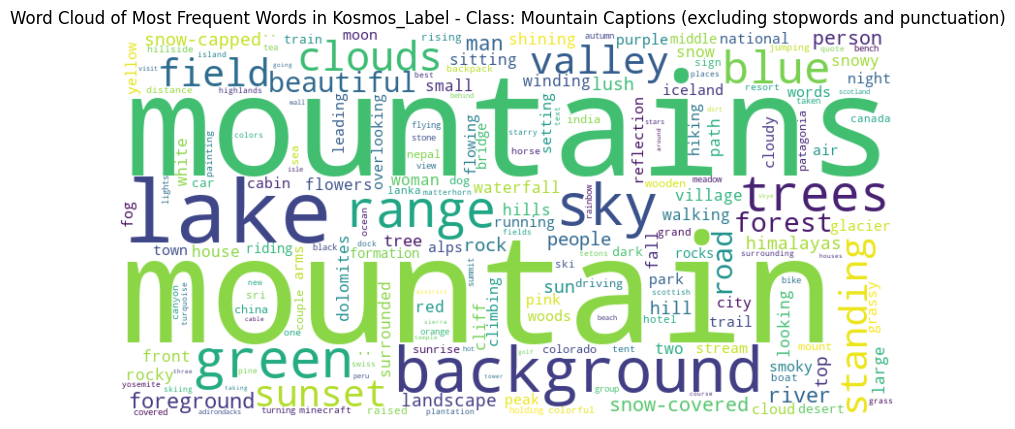

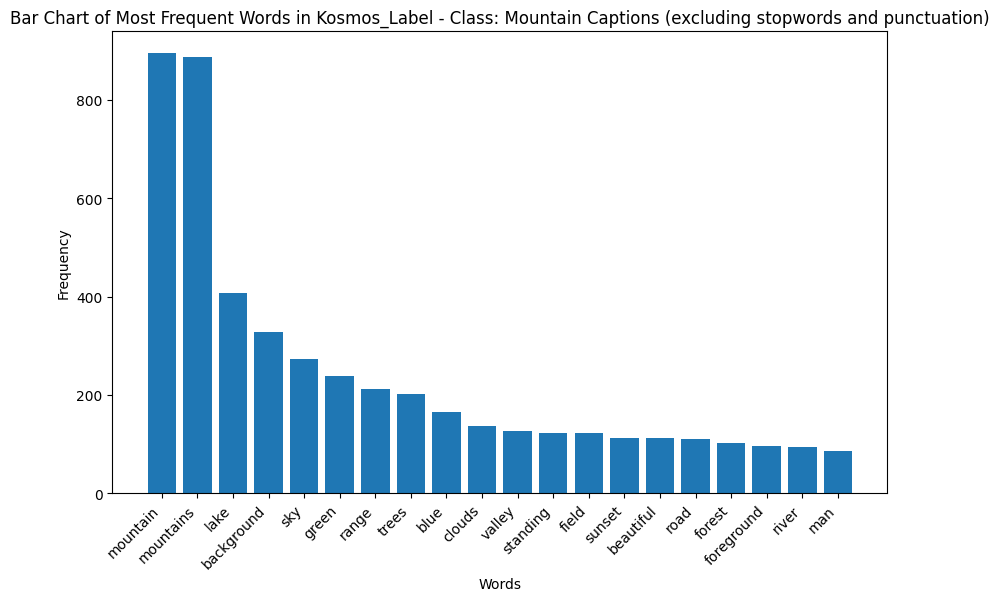

In [40]:
for file, title in output_files.items():
    visualize_top_words_by_class(file, title)

In [44]:
def extract_unique_words_from_files(output_files):
    stop_words = set(stopwords.words('english'))

    unique_landscape_words = set()

    def filter_landscape_words(words):
        landscape_words = set()
        for word in words:
            synsets = wn.synsets(word)
            for synset in synsets:
                hypernyms = synset.hypernyms()
                for hypernym in hypernyms:
                    if 'landscape' in hypernym.definition():
                        landscape_words.add(word)
                        break  # Stop searching hypernyms if found
                if word in landscape_words:
                    break  # Stop searching synsets if found
        return landscape_words

    for file in output_files:
        with open(file, 'r', encoding='utf-8') as f:
            text = f.read()

        words = word_tokenize(text)

        words = [word.lower() for word in words if word.isalpha()]

        words = [word for word in words if word not in stop_words]

        landscape_words = filter_landscape_words(words)

        unique_landscape_words.update(landscape_words)

    return list(unique_landscape_words)

output_files = [blip_output_file, kosomos_output_file]

unique_landscape_words = extract_unique_words_from_files(output_files)

print(unique_landscape_words)


[]
